# Week 7 Demo

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import gdown
gdown.download(id="1jOXqaiSkXoGcB2G0ezHa50nVqeqGE23o", output="ofes_ts.nc") # Downloading .nc data file from google drive

Downloading...
From: https://drive.google.com/uc?id=1jOXqaiSkXoGcB2G0ezHa50nVqeqGE23o
To: /home/jovyan/Demos/ofes_ts.nc
100%|██████████| 73.0M/73.0M [00:01<00:00, 42.9MB/s]


'ofes_ts.nc'

In [3]:
data = xr.open_dataset('ofes_ts.nc') # Loading in the .nc data file using xarray
display(data)
data_renamed = data.rename({'lev': 'depth'}) # Changing the name of the depth coordinate

<xarray.Dataset> Size: 143MB
Dimensions:   (time: 32, lev: 56, lat: 100, lon: 100)
Coordinates:
  * time      (time) datetime64[ns] 256B 2019-11-30 2019-12-01 ... 2019-12-31
  * lon       (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
  * lat       (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
  * lev       (lev) float64 448B 2.5 7.5 12.5 17.5 ... 453.2 472.1 491.3 510.7
Data variables:
    salinity  (time, lev, lat, lon) float32 72MB ...
    temp      (time, lev, lat, lon) float32 72MB ...
Attributes:
    long_name:  [psu] salinity

In [4]:
display(data_renamed) # Depth coordinate now called depth! Notice the icons you can click to get more info on the data

<xarray.Dataset> Size: 143MB
Dimensions:   (time: 32, depth: 56, lat: 100, lon: 100)
Coordinates:
  * time      (time) datetime64[ns] 256B 2019-11-30 2019-12-01 ... 2019-12-31
  * lon       (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
  * lat       (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
  * depth     (depth) float64 448B 2.5 7.5 12.5 17.5 ... 453.2 472.1 491.3 510.7
Data variables:
    salinity  (time, depth, lat, lon) float32 72MB ...
    temp      (time, depth, lat, lon) float32 72MB ...
Attributes:
    long_name:  [psu] salinity

In [6]:
salinity = data_renamed['salinity'] # Grabbing a specific variable from our dataset (now a dataArray)
temp = data_renamed.temp # Two different ways to do this

print(salinity.shape) # Salinity variable has 4 dimensions: (time, depth, lat, lon)
print(temp.shape) # Temperature variable has 4 dimensions: (time, depth, lat, lon)

(32, 56, 100, 100)
(32, 56, 100, 100)


# You try!

## The `temp` data is in °C. Convert it into °F

In [30]:
# Want temperatures in °F 
temp_f = temp*(9/5) + 32 # element wise (vectorized) operations!
temp_f

<xarray.DataArray 'temp' (time: 32, depth: 56, lat: 100, lon: 100)> Size: 72MB
array([[[[84.27372 , 84.26746 , 84.25935 , ..., 83.5047  , 83.49477 ,
          83.48484 ],
         [84.3251  , 84.31851 , 84.3107  , ..., 83.52156 , 83.51175 ,
          83.50127 ],
         [84.362625, 84.35758 , 84.3506  , ..., 83.537415, 83.52903 ,
          83.51967 ],
         ...,
         [84.648994, 84.785645, 85.01277 , ..., 85.02608 , 85.06955 ,
          85.05483 ],
         [84.548935, 84.60565 , 84.73616 , ..., 85.093544, 85.1212  ,
          85.09947 ],
         [84.62483 , 84.61721 , 84.676895, ..., 85.16795 , 85.181435,
          85.16649 ]],

        [[84.20992 , 84.21068 , 84.20946 , ..., 83.50119 , 83.49117 ,
          83.48122 ],
         [84.27153 , 84.27089 , 84.269196, ..., 83.51799 , 83.5081  ,
          83.49759 ],
         [84.318146, 84.31811 , 84.31656 , ..., 83.53375 , 83.5253  ,
          83.5159  ],
...
         [50.516434, 50.496292, 50.45758 , ..., 50.50186 , 50.501537,
          50.506664],
         [50.518288, 50.494137, 50.456394, ..., 50.53456 , 50.532627,
          50.540115],
         [50.51283 , 50.49156 , 50.458347, ..., 50.56256 , 50.55621 ,
          50.561745]],

        [[48.935722, 48.942497, 48.96305 , ..., 49.4832  , 49.497288,
          49.51114 ],
         [48.886063, 48.896156, 48.920258, ..., 49.495914, 49.50654 ,
          49.51875 ],
         [48.85302 , 48.86142 , 48.88186 , ..., 49.50345 , 49.509987,
          49.52105 ],
         ...,
         [50.26957 , 50.246494, 50.206867, ..., 50.266354, 50.26872 ,
          50.271194],
         [50.27193 , 50.24581 , 50.206955, ..., 50.299538, 50.29631 ,
          50.29812 ],
         [50.2675  , 50.24535 , 50.21106 , ..., 50.327362, 50.317   ,
          50.31559 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 256B 2019-11-30 2019-12-01 ... 2019-12-31
  * lon      (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
  * lat      (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
  * depth    (depth) float64 448B 2.5 7.5 12.5 17.5 ... 453.2 472.1 491.3 510.7

In [22]:
# To extract just the internal data from the dataArray (in numpy format)
times = temp.time.values # Now a 1D numpy array of datetimes
depths = temp['depth'].values # Now a 1D numpy array of depths
lats = salinity.lat.values # Now a 1D numpy array of latitudes (since salinity and temp are from same gridded xarray dataset, we can grab the coordinates from either variable!
lons = salinity['lon'].values # Now a 1D numpy array of longitudes

print(times)
print(depths)
print(lats)
print(lons)

['2019-11-30T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2019-12-02T00:00:00.000000000' '2019-12-03T00:00:00.000000000'
 '2019-12-04T00:00:00.000000000' '2019-12-05T00:00:00.000000000'
 '2019-12-06T00:00:00.000000000' '2019-12-07T00:00:00.000000000'
 '2019-12-08T00:00:00.000000000' '2019-12-09T00:00:00.000000000'
 '2019-12-10T00:00:00.000000000' '2019-12-11T00:00:00.000000000'
 '2019-12-12T00:00:00.000000000' '2019-12-13T00:00:00.000000000'
 '2019-12-14T00:00:00.000000000' '2019-12-15T00:00:00.000000000'
 '2019-12-16T00:00:00.000000000' '2019-12-17T00:00:00.000000000'
 '2019-12-18T00:00:00.000000000' '2019-12-19T00:00:00.000000000'
 '2019-12-20T00:00:00.000000000' '2019-12-21T00:00:00.000000000'
 '2019-12-22T00:00:00.000000000' '2019-12-23T00:00:00.000000000'
 '2019-12-24T00:00:00.000000000' '2019-12-25T00:00:00.000000000'
 '2019-12-26T00:00:00.000000000' '2019-12-27T00:00:00.000000000'
 '2019-12-28T00:00:00.000000000' '2019-12-29T00:00:00.000000000'
 '2019-12-30T00:00:00.000

# You try:
## How would you select the *time averaged* *surface* salinity data?

In [7]:
sal_mean_surf = salinity.mean('time').isel(depth = 0) # Using .isel to select the surface depth by its index
display(sal_mean_surf) # Above, we did method chaining on our xarray dataArray to get the time mean at the surface
# Now, the dimensions are (lat, lon - 2D!)

<xarray.DataArray 'salinity' (lat: 100, lon: 100)> Size: 40kB
array([[34.482494, 34.48357 , 34.485016, ..., 34.48666 , 34.48446 ,
        34.481018],
       [34.469864, 34.469738, 34.469612, ..., 34.485764, 34.48349 ,
        34.47985 ],
       [34.455963, 34.454224, 34.452393, ..., 34.484413, 34.48211 ,
        34.47839 ],
       ...,
       [34.43742 , 34.407112, 34.39961 , ..., 33.35626 , 33.359035,
        33.360966],
       [34.426876, 34.38795 , 34.36829 , ..., 33.34619 , 33.348957,
        33.349766],
       [34.422768, 34.386093, 34.363205, ..., 33.338646, 33.340122,
        33.341434]], dtype=float32)
Coordinates:
  * lon      (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
  * lat      (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
    depth    float64 8B 2.5

In [8]:
import cmocean # This is a special library that contains more colormaps suited to oceanography

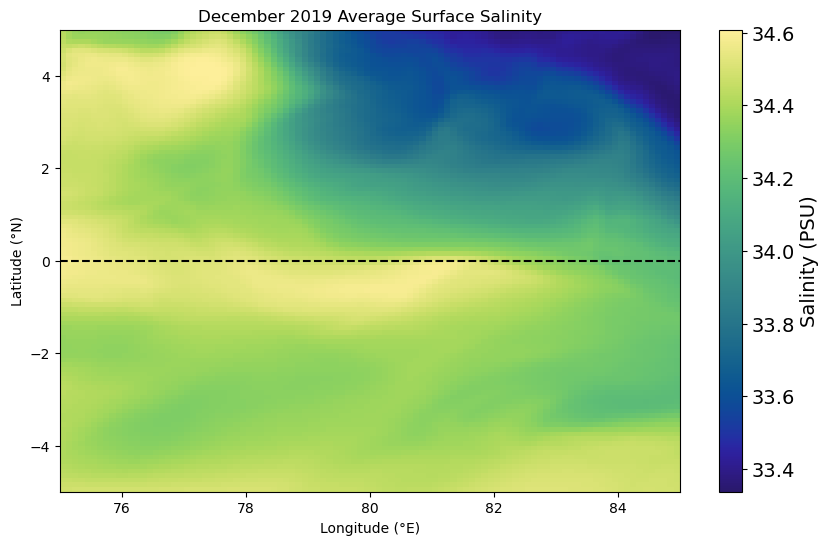

In [10]:
fig = plt.figure(figsize = (10,6)) # Same figure setup as before
ax = fig.add_subplot()

mesh1 = ax.pcolormesh(sal_mean_surf.lon, sal_mean_surf.lat, sal_mean_surf, cmap = cmocean.cm.haline) # pcolormesh is a 2D plot
# It is good to save 2D plots as a variable (e.g. mesh1 in this case) so we can reference it later to add more stuff
cb1 = fig.colorbar(mesh1, ax = ax) # Assigning a colorbar to our plot! (Same idea of giving it a variable to reference later)
cb1.set_label('Salinity (PSU)', fontsize = 14) # Using our colorbar variable to make a label
cb1.ax.tick_params(labelsize = 14) # Making the labels bigger on our colorbar
ax.set_xlabel('Longitude (°E)') 
ax.set_ylabel('Latitude (°N)')
ax.set_title('December 2019 Average Surface Salinity')
ax.axhline(y = 0, color = 'k', ls = '--')

plt.show(fig)

Using xarray's `.where` function

In [24]:
# Let's grab higher salinity data 
high_sal = salinity.where(salinity > 35) # Keeps salinity values greater than 35, sets the rest to nan
high_sal

<xarray.DataArray 'salinity' (time: 32, depth: 56, lat: 100, lon: 100)> Size: 72MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 256B 2019-11-30 2019-12-01 ... 2019-12-31
  * lon      (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
  * lat      (lat) float64 800B -4.95 -4.85 -4.75 -4.65 ... 4.65 4.75 4.85 4.95
  * depth    (depth) float64 448B 2.5 7.5 12.5 17.5 ... 453.2 472.1 491.3 510.7
Attributes:
    long_name:  [psu] salinity

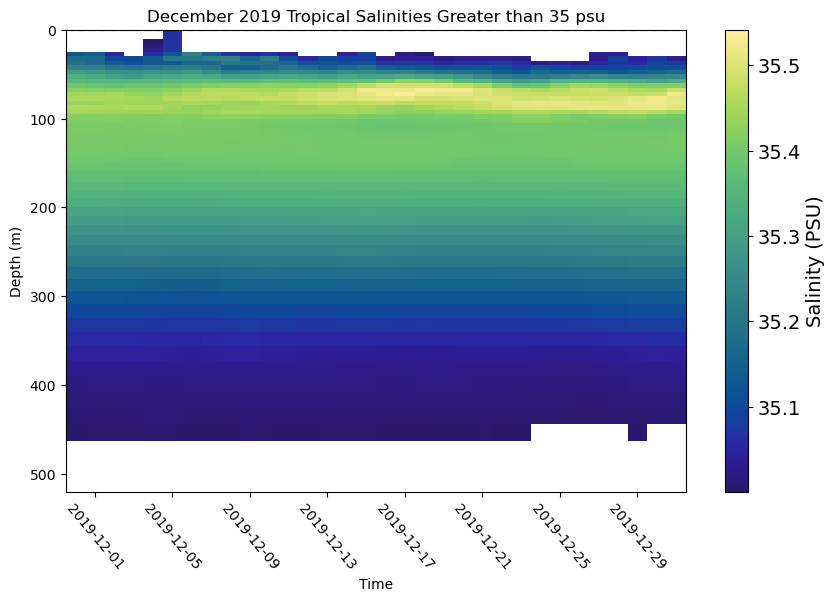

In [29]:
# Now let's take a horizontal mean (e.g. mean over lat and lon) and plot these salinities!
high_sal_mean = high_sal.mean(dim = ['lat', 'lon']) # Now, shape is (time, depth)

fig = plt.figure(figsize = (10,6)) # Same figure setup as before
ax = fig.add_subplot()

mesh1 = ax.pcolormesh(high_sal_mean.time, high_sal_mean.depth, high_sal_mean.T, cmap = cmocean.cm.haline) # pcolormesh is a 2D plot
# It is good to save 2D plots as a variable (e.g. mesh1 in this case) so we can reference it later to add more stuff
cb1 = fig.colorbar(mesh1, ax = ax) # Assigning a colorbar to our plot! (Same idea of giving it a variable to reference later)
cb1.set_label('Salinity (PSU)', fontsize = 14) # Using our colorbar variable to make a label
cb1.ax.tick_params(labelsize = 14) # Making the labels bigger on our colorbar
ax.set_xlabel('Time') 
ax.tick_params("x", labelrotation=-50)
ax.set_ylabel('Depth (m)')
ax.set_title('December 2019 Tropical Salinities Greater than 35 psu')
ax.axhline(y = 0, color = 'k', ls = '--')
ax.invert_yaxis()

plt.show(fig)

# You try:
## How would you select the *time averaged* temperatures such that you can make a plot of longitude (x-axis) versus depth (y-axis) *at the equator*?

In [11]:
# temp_mean_equator = temp.mean('time').sel(lat = 0) # Show how this returns error
temp_mean_equator = temp.mean('time').sel(lat = 0, method = 'nearest') # more method chaining
temp_mean_equator # Should be 2D now (depth, lon)

<xarray.DataArray 'temp' (depth: 56, lon: 100)> Size: 22kB
array([[29.452074 , 29.44798  , 29.444235 , ..., 29.35662  , 29.35924  ,
        29.361767 ],
       [29.422117 , 29.418932 , 29.415981 , ..., 29.308483 , 29.310968 ,
        29.314    ],
       [29.416376 , 29.412588 , 29.409012 , ..., 29.288244 , 29.290007 ,
        29.29178  ],
       ...,
       [10.200198 , 10.208425 , 10.217955 , ..., 10.523312 , 10.526534 ,
        10.529984 ],
       [10.1062355, 10.114684 , 10.120115 , ..., 10.378538 , 10.378327 ,
        10.377829 ],
       [ 9.945028 ,  9.94174  ,  9.937841 , ..., 10.150049 , 10.147938 ,
        10.145366 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 800B 75.05 75.15 75.25 75.35 ... 84.75 84.85 84.95
    lat      float64 8B 0.05
  * depth    (depth) float64 448B 2.5 7.5 12.5 17.5 ... 453.2 472.1 491.3 510.7

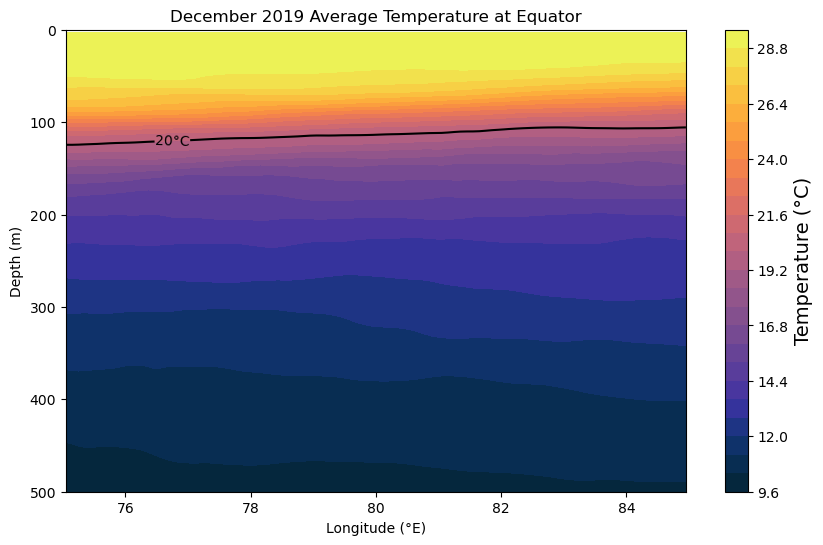

In [10]:
fig = plt.figure(figsize = (10,6)) # Same figure set up!
ax = fig.add_subplot()

# We will make a contour fill plot using contourf - another 2D plot!
cont2 = ax.contourf(temp_mean_equator.lon, temp_mean_equator.depth, temp_mean_equator, levels = 30, cmap = cmocean.cm.thermal)
line = ax.contour(temp_mean_equator.lon, temp_mean_equator.depth, temp_mean_equator, levels = [20], colors = 'k') # Line contour for 20°C
ax.clabel(line, fmt='20°C', fontsize=10) # Giving our line contour a label
cb2 = fig.colorbar(cont2, ax = ax)
cb2.set_label('Temperature (°C)', fontsize = 14)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(500, 0) # OR plt.gca().invert_yaxis()
ax.set_title('December 2019 Average Temperature at Equator')

plt.show(fig)

# You try:
## How do I only plot the isotherms (lines of constant temperature) from 14°C to 26°C at 2°C intervals? (HINT: use np.arange)

(250.0, 0.0)

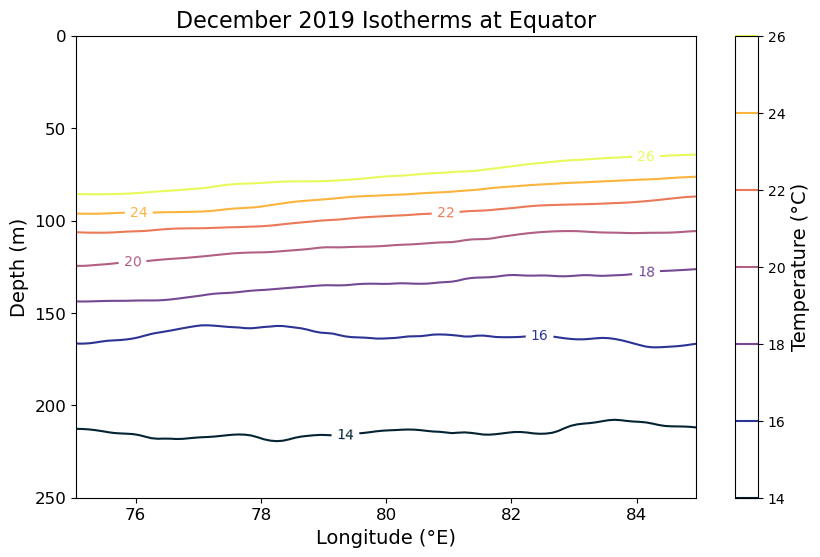

In [11]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

# Now using just a contour plot (not filled), but it is still 2D because it has color corresponding to temperature
cont3 = ax.contour(temp_mean_equator.lon, temp_mean_equator.depth, temp_mean_equator, levels = np.arange(14, 28, 2), cmap = cmocean.cm.thermal)
cb3 = fig.colorbar(cont3)

cl = cont3.clabel(fontsize = 10)
cb3.set_label('Temperature (°C)', fontsize = 14)

ax.set_xlabel('Longitude (°E)', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14)
ax.set_title('December 2019 Isotherms at Equator', fontsize=16)
ax.tick_params(labelsize=12)

ax.set_ylim(250, 0)